Epoch: 0:   2%|▏         | 2/123 [01:29<1:26:01, 42.66s/it]

HI


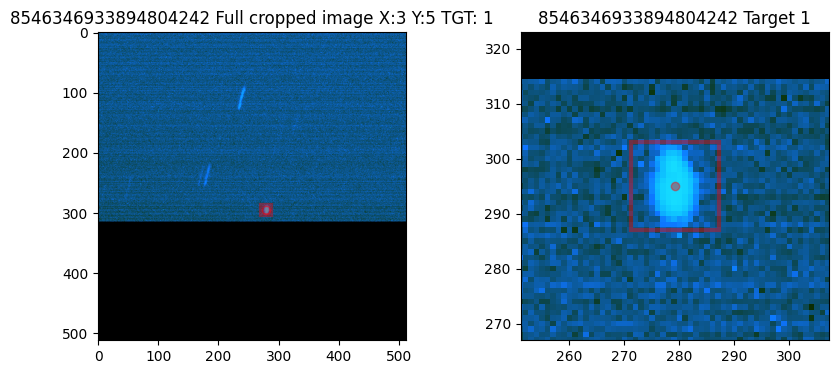

Epoch: 0:   2%|▏         | 2/123 [01:35<1:36:17, 47.75s/it]


KeyboardInterrupt: Interrupted by user

In [3]:
import torch
from torchvision.datasets import CocoDetection
import torchvision.transforms.v2 as T
from torch.utils.data import DataLoader
import os
import tqdm
from torch.utils.data import DataLoader
from tqdm import tqdm
from training_frameworks.image_stitching import partition_images
from training_frameworks.format_targets import format_targets_bboxes
from evaluation.plot_predictions import plot_image_stitch_bbox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

train_params = {
    "epochs": 100,
    "batch_size": 4,
    "lr": 4e-4, #sqrt(batch_size)*4e-4
    "model_path": None,
    "training_dir": "/mnt/c/Users/david.chaparro/Documents/data/RME04TestingSet/train",
    "validation_dir": "/mnt/c/Users/david.chaparro/Documents/data/RME04TestingSet/val",
    "gpu": 0,
    "momentum": 0.9,
    "weight_decay": 0.0005
}

# Custom transforms (RetinaNet expects images and targets)
transform = T.Compose([
    T.ToTensor(),
])

# Dataset paths
training_dir = train_params["training_dir"]
validation_dir = train_params["validation_dir"]
base_dir = os.path.dirname(training_dir)
models_dir = os.path.join(base_dir, "models")
os.makedirs(models_dir, exist_ok=True)

# Load COCO-style dataset
training_set = CocoDetection(root=training_dir, annFile=os.path.join(training_dir, "annotations", "annotations.json"), transforms=transform)
validation_set = CocoDetection(root=validation_dir, annFile=os.path.join(validation_dir, "annotations", "annotations.json"), transforms=transform)
training_loader = DataLoader(training_set, batch_size=train_params["batch_size"], shuffle=True, collate_fn=lambda x: (zip(*x)))
validation_loader = DataLoader(validation_set, batch_size=train_params["batch_size"], shuffle=True, collate_fn=lambda x: (zip(*x)))

# Optimizer
device = torch.device(f"cuda:{train_params["gpu"]}" if torch.cuda.is_available() else "cpu")

for epoch in range(train_params["epochs"]):
    for images, targets in tqdm(training_loader, desc=f"Epoch: {epoch}"):
        images = list(img.to(device) for img in images)
        targets = format_targets_bboxes(targets)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        images_cropped, targets_cropped = partition_images(images, targets, device)
        plot_image_stitch_bbox(images_cropped, targets_cropped,show=True)

        print("HI")            
